In [4]:
# 필요한 모듈 import
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [7]:
# 한글처리
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [8]:
# train data 불러오기
train_df = pd.read_csv('train_2020.csv', encoding='utf-8')
train_df.head()

,구,전용면적(㎡),계약년월,층,건축년도,회사채금리,매매가격지수,건설공사비지수,버스정류장수,지하철수,...,전용면적구간_target_sum,전용면적구간_target_max,전용면적구간_target_min,전용면적구간_target_count,아파트명_target_mean,아파트명_target_sum,아파트명_target_max,아파트명_target_min,아파트명_target_count,target
0,강남구,105.8064,202306,중층,2021,4.356,92.7,127.42,86.0,2.0,...,4136037878,1450000,19500,25377,148554.226331,100422657,420000,39600,676,240000
1,강남구,74.2500,202301,중층,1983,4.704,94.6,127.10,86.0,2.0,...,1500097866,438000,13000,17510,69941.177197,594430065,730000,13950,8499,210000
2,강남구,61.1900,202302,중층,1983,4.274,93.6,127.16,86.0,2.0,...,1500097866,438000,13000,17510,69941.177197,594430065,730000,13950,8499,199000
3,강남구,83.1700,202304,중층,1983,4.072,92.6,127.45,86.0,2.0,...,1500097866,438000,13000,17510,69941.177197,594430065,730000,13950,8499,249000
4,강남구,83.1700,202304,중층,1983,4.072,92.6,127.45,86.0,2.0,...,1500097866,438000,13000,17510,69941.177197,594430065,730000,13950,8499,277000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155974 entries, 0 to 155973
Data columns (total 60 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   구                    155974 non-null  object 
 1   전용면적(㎡)              155974 non-null  float64
 2   계약년월                 155974 non-null  int64  
 3   층                    155974 non-null  object 
 4   건축년도                 155974 non-null  int64  
 5   회사채금리                155974 non-null  float64
 6   매매가격지수               155974 non-null  float64
 7   건설공사비지수              155974 non-null  float64
 8   버스정류장수               155974 non-null  float64
 9   지하철수                 155974 non-null  float64
 10  연식                   155974 non-null  int64  
 11  x좌표                  155974 non-null  float64
 12  y좌표                  155974 non-null  float64
 13  아파트명                 155974 non-null  object 
 14  강남권여부                155974 non-null  int64  
 15  계약년              

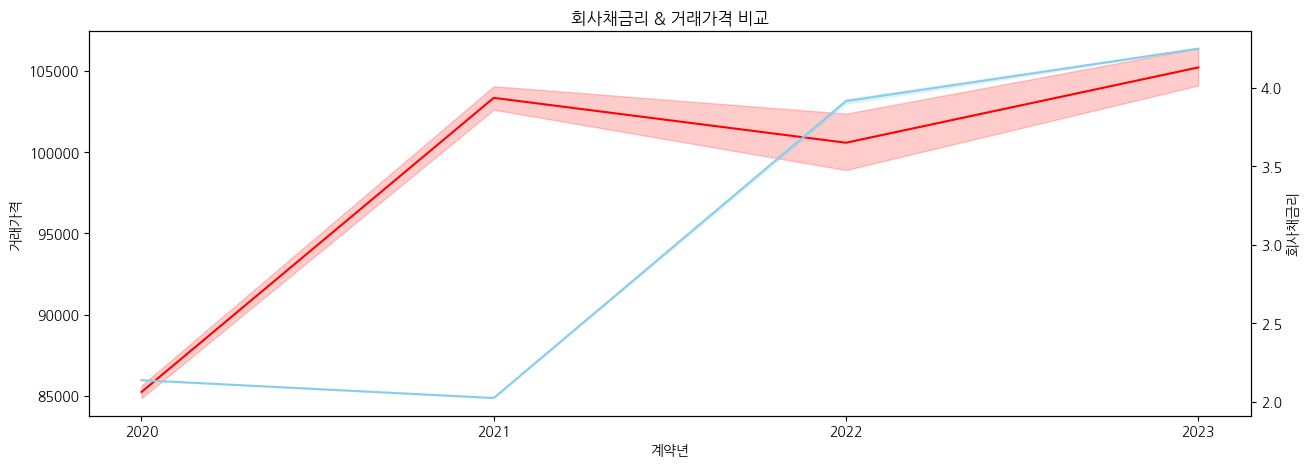

In [17]:
# 시각화 자료 생성 코드
fig = plt.figure(figsize=(15, 5))
ax = sns.lineplot(train_df, x='계약년', y='target', color='red')
plt.ylabel('거래가격')
ax2 = ax.twinx()
ax2 = sns.lineplot(train_df, x='계약년', y='회사채금리', color='skyblue')
plt.title('회사채금리 & 거래가격 비교')
plt.xticks(range(2020, 2024))
plt.show()
# plt.savefig('./visualization/회사채금리_거래가격 비교.png')

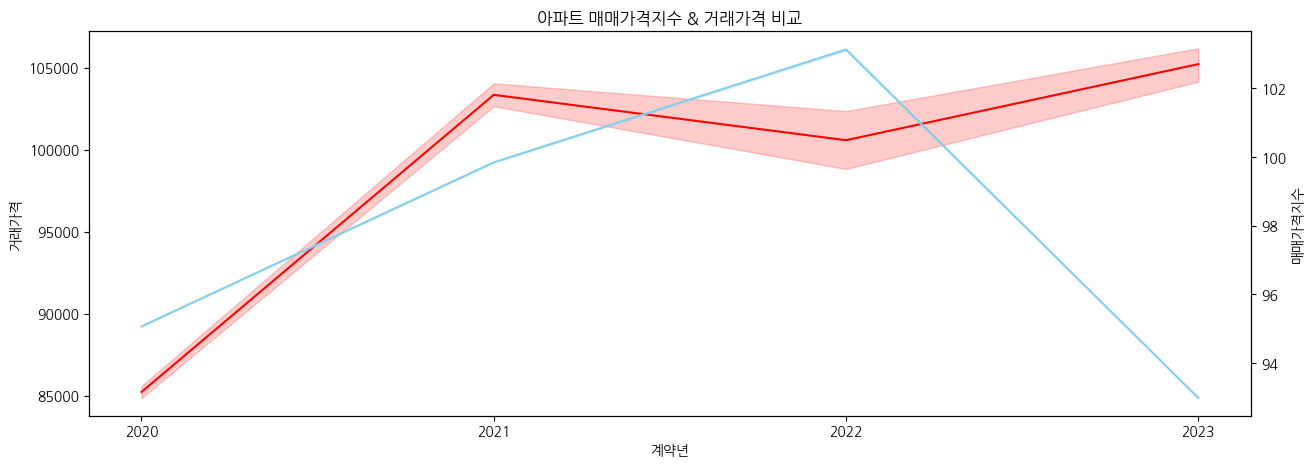

In [18]:
# 아파트 매매가격지수 비교
fig = plt.figure(figsize=(15, 5))
ax = sns.lineplot(train_df, x='계약년', y='target', color='red')
plt.ylabel('거래가격')
ax2 = ax.twinx()
ax2 = sns.lineplot(train_df, x='계약년', y='매매가격지수', color='skyblue')
plt.title('아파트 매매가격지수 & 거래가격 비교')
plt.xticks(range(2020, 2024))
plt.show()
# plt.savefig('./visualization/아파트매매가격지수_거래가격 비교.png')

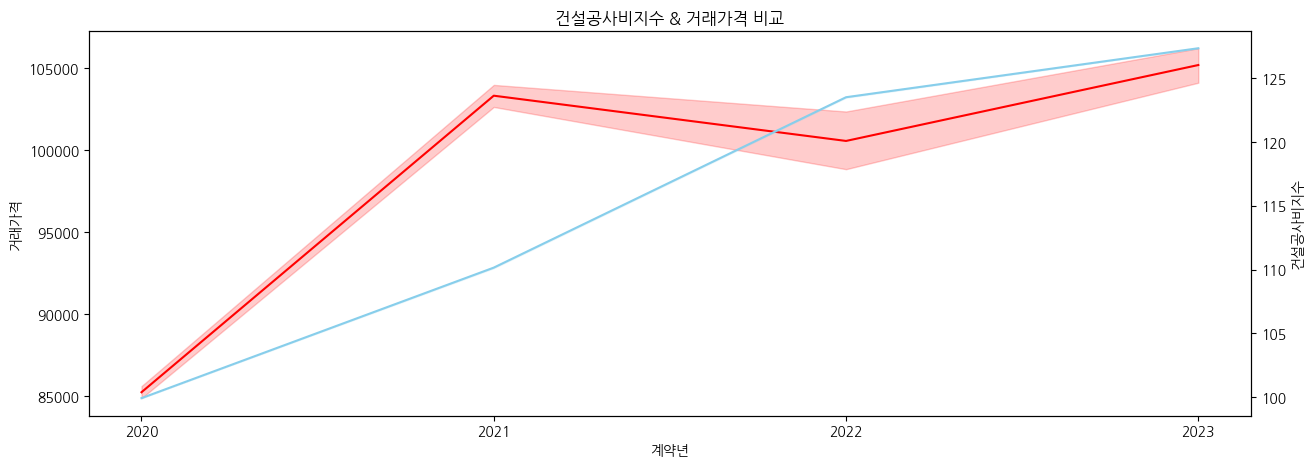

In [19]:
# 건설공사비지수 비교
fig = plt.figure(figsize=(15, 5))
ax = sns.lineplot(train_df, x='계약년', y='target', color='red')
plt.ylabel('거래가격')
ax2 = ax.twinx()
ax2 = sns.lineplot(train_df, x='계약년', y='건설공사비지수', color='skyblue')
plt.title('건설공사비지수 & 거래가격 비교')
plt.xticks(range(2020, 2024))
plt.show()
# plt.savefig('./visualization/건설공사비지수_거래가격 비교.png')

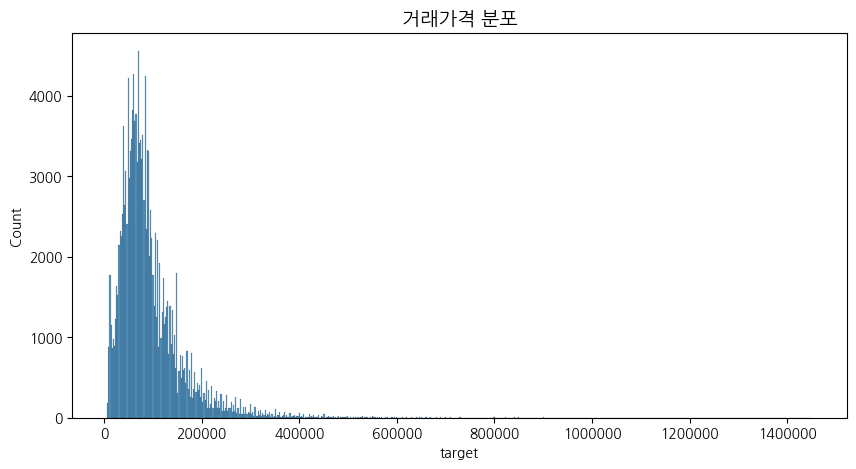

In [9]:
# 거래가격분포 확인
fig = plt.figure(figsize=(10, 5))
sns.histplot(train_df['target'])
plt.title("거래가격 분포", fontsize=14)
ax = plt.gca()
ax.ticklabel_format(style='plain')
plt.show()
# plt.savefig('./visualization/거래가격 분포.png')

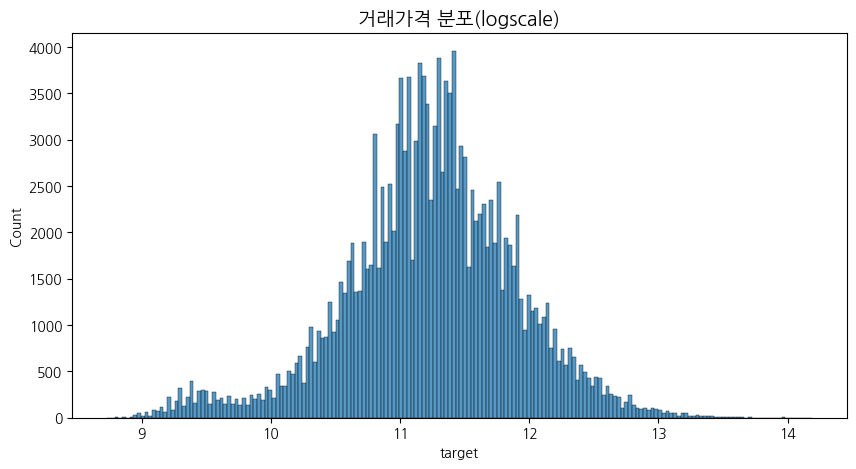

In [10]:
# 거래가격분포 logscale
fig = plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(train_df['target']))
plt.title("거래가격 분포(logscale)", fontsize=14)
ax = plt.gca()
ax.ticklabel_format(style='plain')
plt.show()
# plt.savefig('./visualization/거래가격 분포(logscale).png')

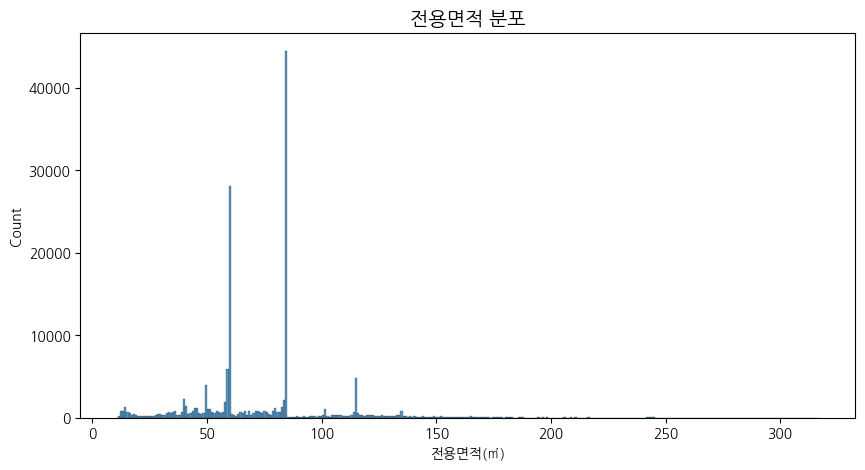

In [11]:
# 전용면적 분포 확인
fig = plt.figure(figsize=(10, 5))
sns.histplot(train_df['전용면적(㎡)'])
plt.title("전용면적 분포", fontsize=14)
plt.show()
# plt.savefig('./visualization/전용면적 분포.png')

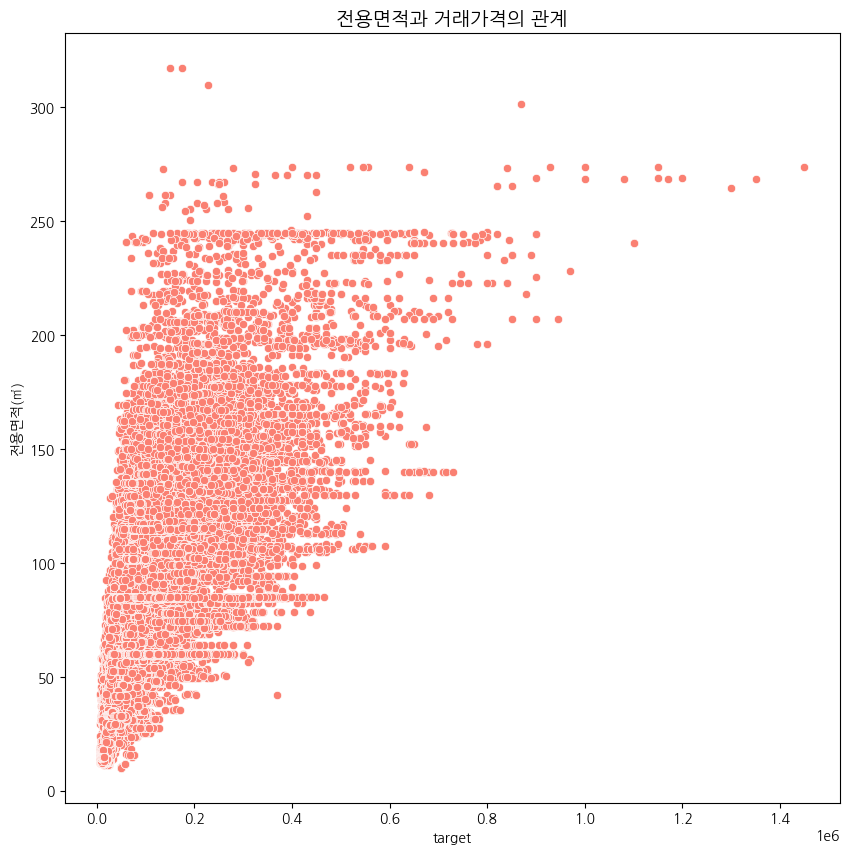

In [12]:
# 전용면적과 거래가격의 관계
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(train_df, x=train_df['target'], y=train_df['전용면적(㎡)'], color='salmon')
plt.title("전용면적과 거래가격의 관계", fontsize=14)
plt.show()
# plt.savefig('./visualization/전용면적과 거래가격의 관계.png')

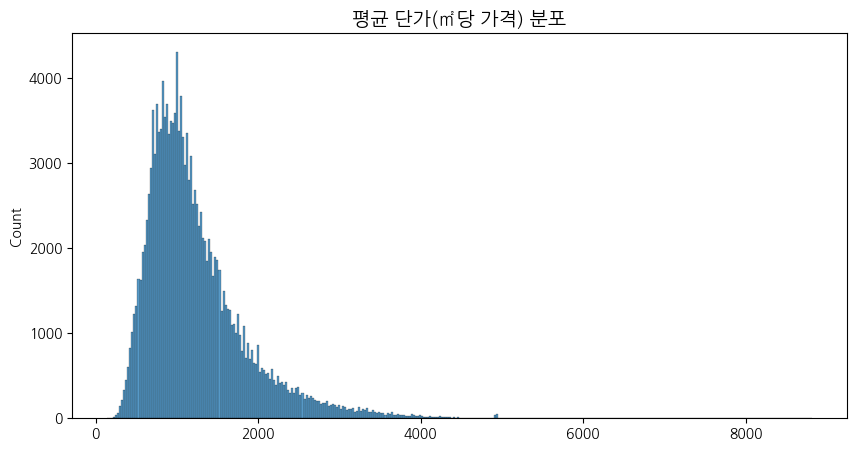

In [13]:
# 평균 단가(㎡당 가격) 확인
# 거래가격 ÷ 전용면적
fig = plt.figure(figsize=(10, 5))
sns.histplot(train_df['target'] / train_df['전용면적(㎡)'])
plt.title("평균 단가(㎡당 가격) 분포", fontsize=14)
plt.show()
# plt.savefig('./visualization/평균 단가(㎡당 가격) 분포.png')

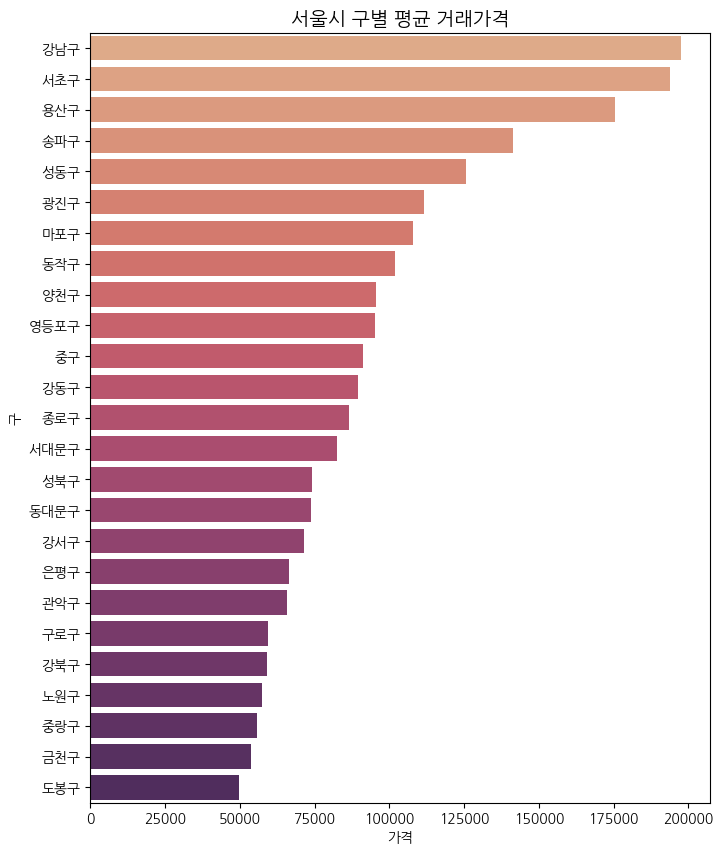

In [14]:
# 구별 평균거래가 확인
df_sorted = train_df.groupby('구')['target'].agg(가격='mean').reset_index()
df_sorted = df_sorted.sort_values('가격', ascending=False)

fig = plt.figure(figsize=(8,10))
sns.barplot(
    data=df_sorted,
    x="가격", 
    y="구", 
    palette="flare",
    legend=False
)
plt.title("서울시 구별 평균 거래가격", fontsize=14)
plt.xlabel("가격")
plt.ylabel("구")
plt.show()
# plt.savefig('./visualization/서울시 구별 평균 거래가격.png')

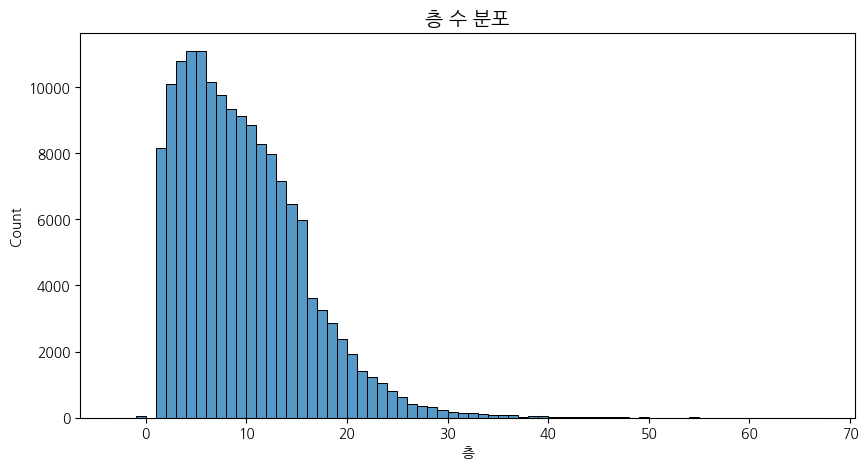

In [15]:
# 층수 분포 확인
fig = plt.figure(figsize=(10, 5))
sns.histplot(train_df['층'], binwidth=1)
plt.title("층 수 분포", fontsize=14)
plt.show()
# plt.savefig('./visualization/층 수 분포.png')

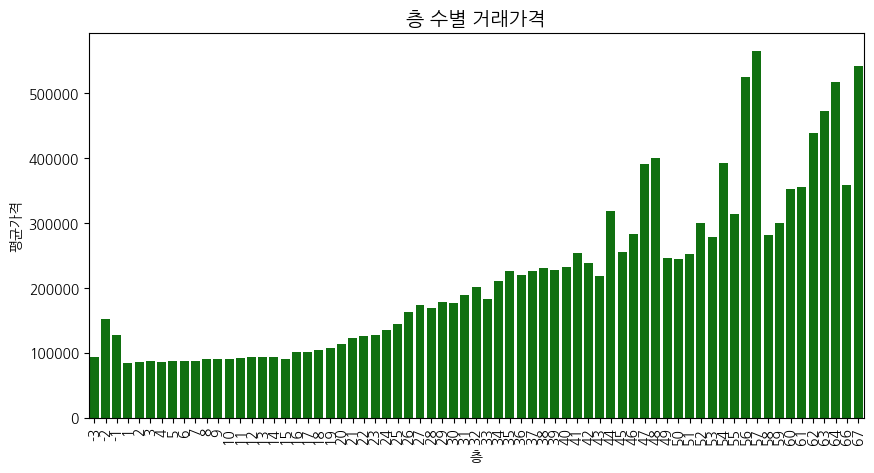

In [16]:
# 층수별 거래가격 확인
fig = plt.figure(figsize=(10, 5))
fp_df = train_df.groupby('층')['target'].agg(가격='mean').reset_index()
sns.barplot(fp_df, x='층', y='가격', color='Green')
plt.xticks(rotation=90)
plt.title("층 수별 거래가격", fontsize=14)
plt.ylabel('평균가격')
plt.show()
# plt.savefig('./visualization/층 수별 거래가격.png')

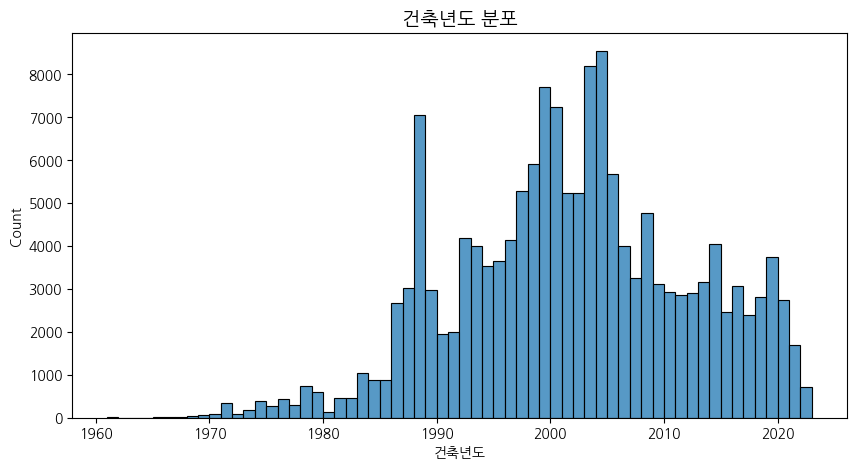

In [17]:
# 건축년도 분포
plt.figure(figsize=(10,5))
sns.histplot(train_df['건축년도'], binwidth=1)
plt.title("건축년도 분포", fontsize=14)
plt.show()
# plt.savefig('./visualization/건축년도 분포.png')

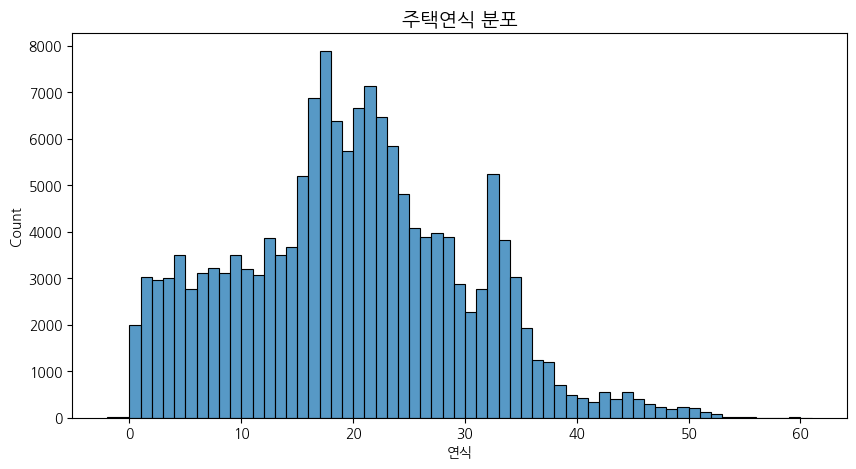

In [18]:
# 주택연식 분포
plt.figure(figsize=(10,5))
sns.histplot(train_df['연식'], binwidth=1)
plt.title("주택연식 분포", fontsize=14)
plt.show()
# plt.savefig('./visualization/주택연식 분포.png')

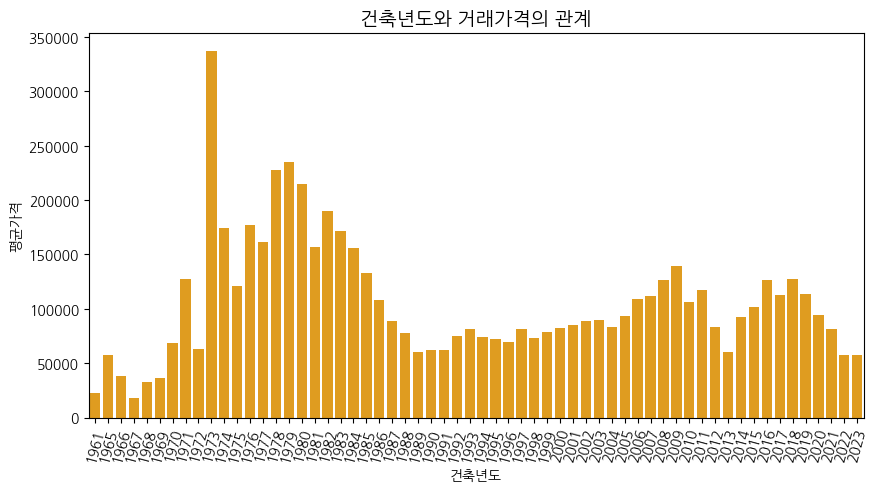

In [19]:
# 건축년도와 거래가격의 관계
cyear_df = train_df.groupby('건축년도')['target'].agg(가격='mean').reset_index()

plt.figure(figsize=(10,5))
sns.barplot(cyear_df, x='건축년도', y='가격', color='Orange')
plt.title("건축년도와 거래가격의 관계", fontsize=14)
plt.ylabel('평균가격')
plt.xticks(rotation=75)
plt.show()
# plt.savefig('./visualization/건축년도와 거래가격의 관계.png')

In [20]:
# 주택연식이 음수값이 나올 수 없기 때문에 실제로는 선분양 이지만 이를 0으로 처리한다.
cond = train_df['연식'] < 0
train_df.loc[cond, '연식'] = 0

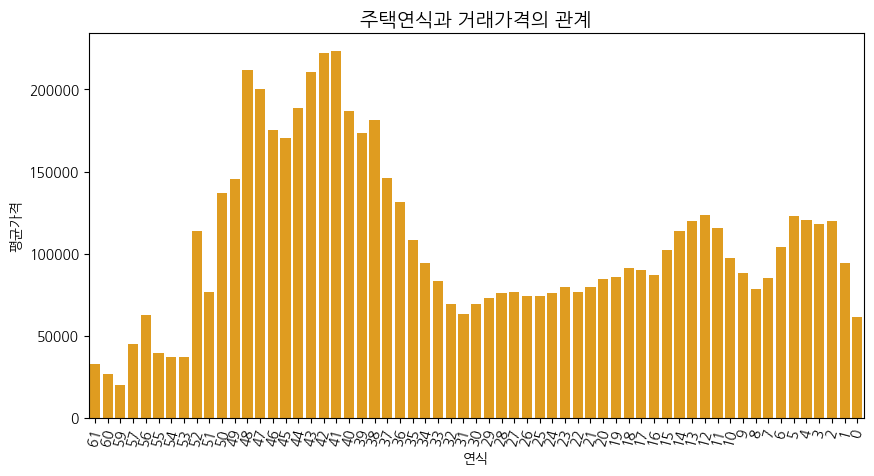

In [21]:
# 주택연식과 거래가격의 관계
year_df = train_df.groupby('연식')['target'].agg(가격='mean').reset_index()

plt.figure(figsize=(10,5))
sns.barplot(year_df, x='연식', y='가격', color='Orange')
plt.title("주택연식과 거래가격의 관계", fontsize=14)
plt.ylabel('평균가격')
plt.gca().invert_xaxis()
plt.xticks(rotation=75)
plt.show()
# plt.savefig('./visualization/주택연식과 거래가격의 관계.png')

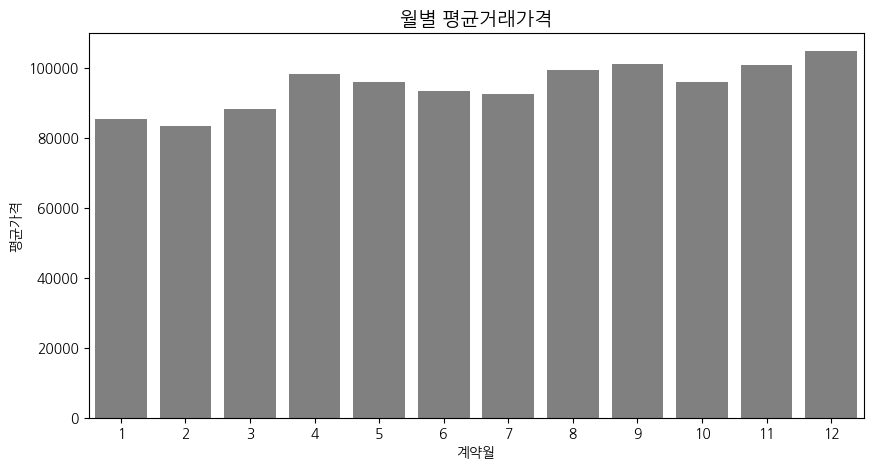

In [22]:
# 월별 평균 거래가격
month_df = train_df.groupby('계약월')['target'].agg(가격='mean').reset_index()

plt.figure(figsize=(10,5))
sns.barplot(month_df, x='계약월', y='가격', color='Grey')
plt.title("월별 평균거래가격", fontsize=14)
plt.ylabel('평균가격')
plt.show()
# plt.savefig('./visualization/월별 평균거래가격.png')

In [23]:
# 아파트명 브랜드 처리
train_df['아파트명'].unique()

array(['개포더샵트리에', '개포주공5단지', '개포주공6단지', ..., '종로센트레빌', '묵정', '월계흥화브라운빌'],
      shape=(5800,), dtype=object)

In [24]:
apt = train_df[['아파트명', 'target']]
apt.head()

,아파트명,target
0,개포더샵트리에,240000
1,개포주공5단지,210000
2,개포주공5단지,199000
3,개포주공5단지,249000
4,개포주공5단지,277000


In [26]:
brand_patterns = {
    "래미안": r"래미안|레미안",
    "힐스테이트": r"힐스테이트|디에이치",
    "자이": r"자이",
    "e편한세상": r"e-편한세상|이편한세상|e편한세상",
    "롯데캐슬": r"롯데캐슬|르엘",
    "아이파크": r"PARK",
    "푸르지오": r"푸르지오|써밋",
    "더샵": r"더샵",
    "센트레빌": r"센트레빌",
    "스위첸": r"스위첸",
    "유보라": r"유보라",
    "주공": r"주공|엘에이치|휴먼시아"
}

# 초기화
apt['브랜드명'] = "일반"

# 브랜드별로 매칭
for brand, pattern in brand_patterns.items():
    mask = apt['아파트명'].str.contains(pattern, flags=re.IGNORECASE, regex=True)
    apt.loc[mask, '브랜드명'] = brand

# 결과 확인
apt.head()

,아파트명,target,브랜드명
0,개포더샵트리에,240000,더샵
1,개포주공5단지,210000,주공
2,개포주공5단지,199000,주공
3,개포주공5단지,249000,주공
4,개포주공5단지,277000,주공


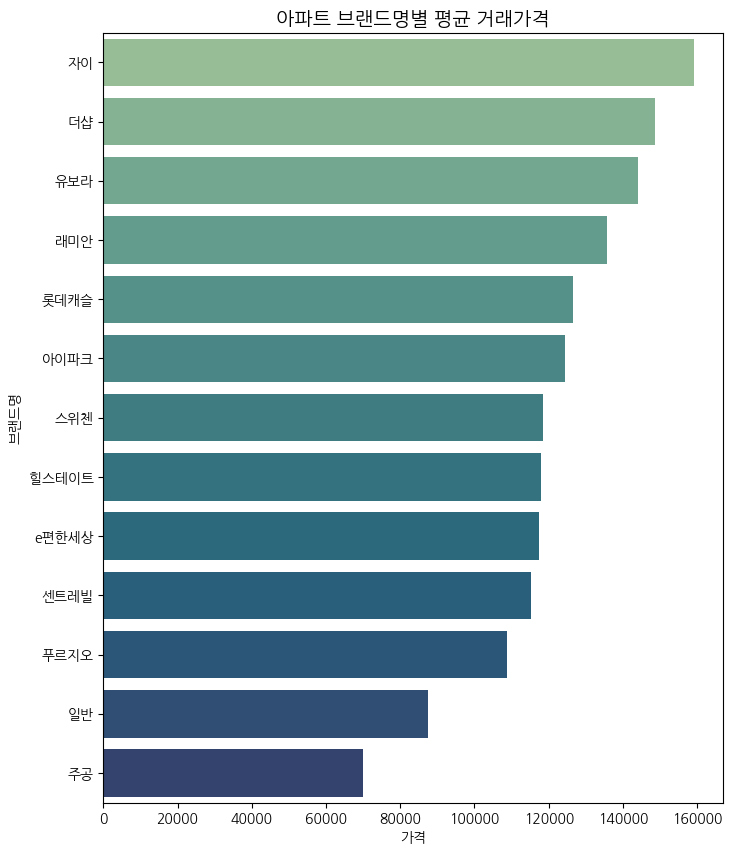

In [28]:
# 브랜드별 평균거래가격
apt_brand = apt.groupby('브랜드명')['target'].agg(가격='mean').reset_index()
apt_sorted = apt_brand.sort_values('가격', ascending=False)

fig = plt.figure(figsize=(8,10))
sns.barplot(
    data=apt_sorted,
    x="가격", 
    y="브랜드명", 
    palette="crest",
    legend=False
)
plt.title("아파트 브랜드명별 평균 거래가격", fontsize=14)
plt.xlabel("가격")
plt.ylabel("브랜드명")
plt.show()
# plt.savefig('./visualization/아파트 브랜드명별 평균 거래가격.png')

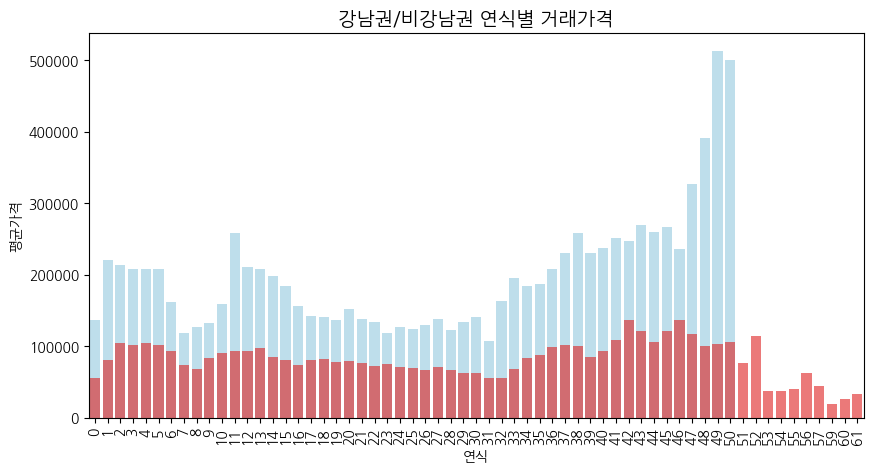

In [31]:
# 강남권/비강남권 연식별 거래가격
gangnam_df = gangnam.groupby('연식')['target'].agg(가격='mean').reset_index()
n_gangnam_df = n_gangnam.groupby('연식')['target'].agg(가격='mean').reset_index()

fig = plt.figure(figsize=(10, 5))
ax = sns.barplot(gangnam_df, x='연식', y='가격', color='skyblue', alpha=0.6)
plt.xticks(rotation=90)
# ax2 = ax.twinx()
ax = sns.barplot(n_gangnam_df, x='연식', y='가격', color='red', alpha=0.6)
plt.ylabel('평균가격')
plt.xticks(rotation=90)
plt.title("강남권/비강남권 연식별 거래가격", fontsize=14)
plt.show()
# plt.savefig('./visualization/강남권_비강남권 연식별 거래가격.png')

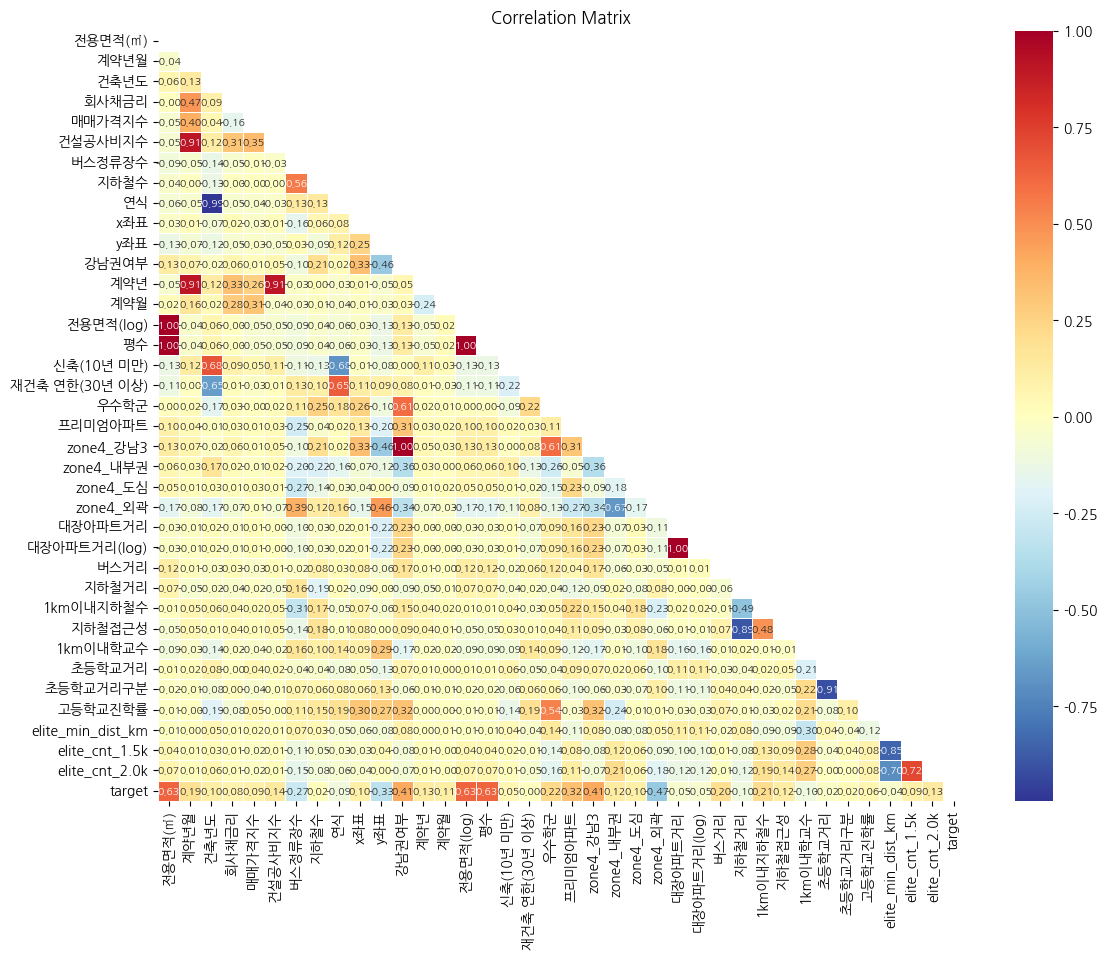

In [35]:
# 데이터의 상관계수 행렬을 생성
corr = train.corr(numeric_only=True, method='spearman')
mask = np.ones_like(corr, dtype=bool)
mask = np.triu(mask)

# 히트맵 형태로 상관행렬 시각화하기
plt.figure(figsize=(13,10))
sns.heatmap(data=corr, annot=True, fmt='.2f', annot_kws={"size": 7.5}, mask=mask, linewidths=.5, cmap='RdYlBu_r') 
plt.title('Correlation Matrix')
plt.show()
# plt.savefig('./visualization/Correlation_Matrix.png')